In [138]:
import numpy as np

def BoxMuller(N):
    u1 = np.random.rand(int(N/2))
    u2 = np.random.rand(int(N/2))
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    if N % 2 == 0:
      return np.ravel(np.column_stack((z1,z2)))
    else:
      return np.append(np.ravel(np.column_stack((z1,z2))), np.sqrt(-2*np.log(np.random.rand()))*np.cos(2*np.pi*np.random.rand()))



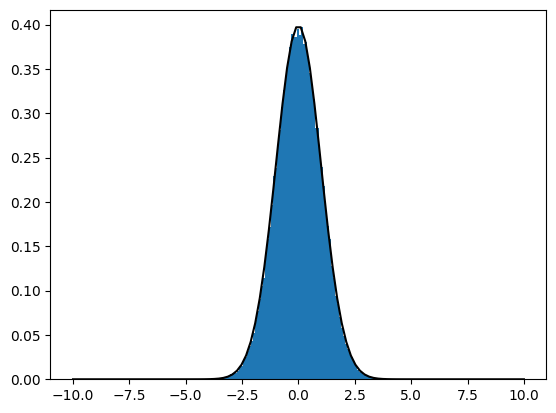

In [140]:
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-10,10,100)

Z = BoxMuller(1e5)

plt.hist(Z, bins = 100, density = True)
plt.plot(x, stats.norm.pdf(x), 'k')

In [95]:
def MarsagliaPolar(N):
  if N % 2 == 1:
       N += 1
  output = np.empty(N)
  U = np.random.uniform(size = (int(N/2),2))
  q = (2 * U[:,0] - 1)**2 + (2*U[:,1]-1)**2
  while not np.all(q < 1):
      failed_indices = np.where(~(q<1))[0]
      U[failed_indices] = np.random.uniform(size=(len(failed_indices), 2))
      q = (2 * U[:,0] - 1)**2 + (2*U[:,1]-1)**2

  w = np.sqrt(-2*np.log(q)/q)
  U[:,0] = (2 * U[:,0] - 1) * w
  U[:,1] = (2 * U[:,1] - 1) * w
  return np.ravel(U)



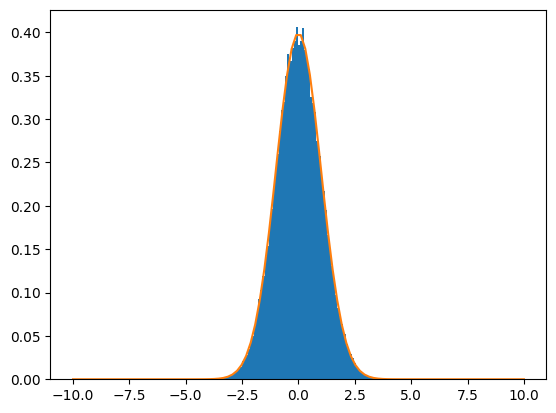

In [100]:
x = np.linspace(-10,10,100)

Z = MarsagliaPolar(100000)
plt.hist(Z, bins = 100, density = True)
plt.plot(x, stats.norm.pdf(x))
plt.show()

BoxMuller runtime: 0.0557 seconds
MarsagliaPolar runtime: 0.0704 seconds
Ziggurat runtime: 0.0289 seconds


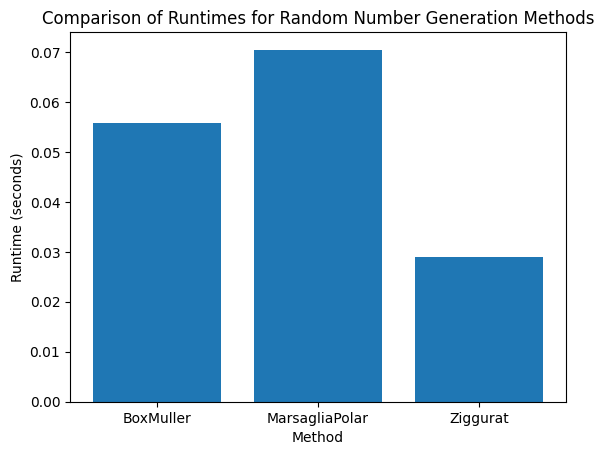

In [129]:
import time
N = 1e6
start_time = time.time()
BoxMuller(N)
boxmuller_time = time.time() - start_time
print(f"BoxMuller runtime: {boxmuller_time:.4f} seconds")

start_time = time.time()
MarsagliaPolar(int(N))
marsaglia_time = time.time() - start_time
print(f"MarsagliaPolar runtime: {marsaglia_time:.4f} seconds")

start_time = time.time()
Ziggurat = np.random.randn(int(N))
ziggurat_time = time.time() - start_time
print(f"Ziggurat runtime: {ziggurat_time:.4f} seconds")

methods = ['BoxMuller', 'MarsagliaPolar', 'Ziggurat']
times = [boxmuller_time, marsaglia_time, ziggurat_time]

plt.bar(methods, times)
plt.xlabel('Method')
plt.ylabel('Runtime (seconds)')
plt.title('Comparison of Runtimes for Random Number Generation Methods')
plt.show()